BREAST TUMORS CLUSTERING

This project analyses breast tumors cells to discover trends and connections between certain features and diagnoses through unsupervised method (Clustering). After Exploratory Data Analysis, a PCA will be perform to reduce dimensionality (we have 30 features), then a K-means clustering and a cross analysis will be done between identified clusters, the principal components and the diagnosis feature. 
- Dataset: Breast Cancer Diagnosis Dataset
- Tools: K-means, PCA, pandas, sklearn, seaborn

In [55]:
#Importation of required libraries
import pandas as pd 
import numpy as py 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

1. Preprocessing (Load Data, Missing data treatment, Univariate analysis, Outliers treatment )

In [3]:
#Load Data
data = pd.read_csv('wbcd.csv')
data = data.iloc[:,1:]
data


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [4]:
#Dataset structure and missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [5]:
# drop duplicates value if it exist
data.drop_duplicates(inplace = True) 
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [14]:
#Descriptive stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


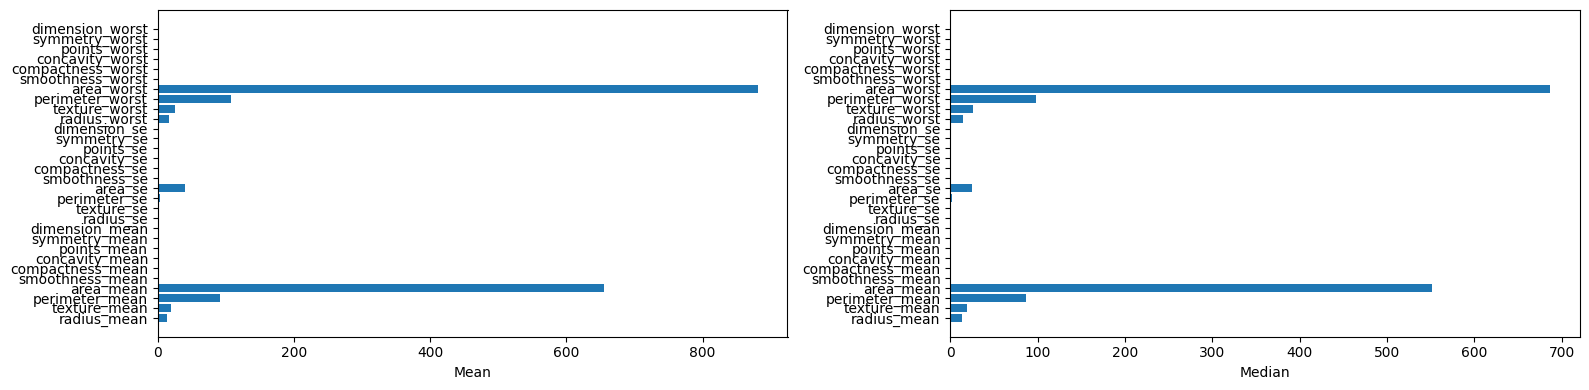

In [18]:
#Mean & Median analysis 
data_num = data.select_dtypes(include='number')
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.barh(y = data_num.columns, width = data_num.mean())
plt.xlabel("Mean")
plt.tight_layout()

plt.subplot(1,2,2)
plt.barh(width = data_num.median(), y = data_num.columns)
plt.xlabel("Median")
plt.tight_layout()

plt.show()

Mean of ["area_wrost"] > 800, but Median of ["area_wrost"] < 700 it means their is outliers present in that column. Similarly Mean of ["area_mean"] > 600, but Median of ["area_mean"] < 600 it means their is outliers present in that column.

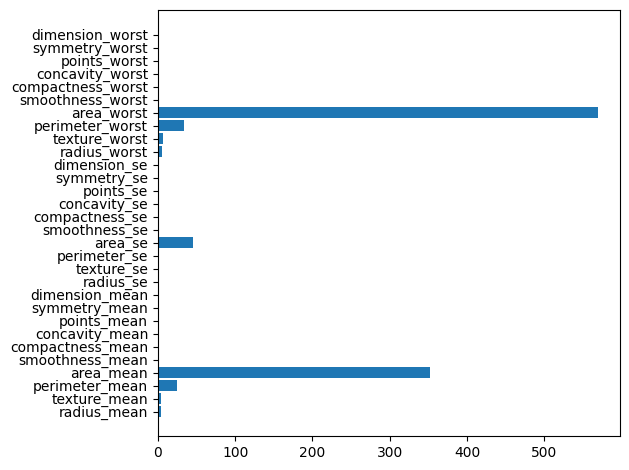

In [21]:
#Data spreading analysis (Standard deviation)
plt.barh(width = data_num.std(), y = data_num.columns)
plt.tight_layout()
plt.show()

A low standard deviation means that most of the observations are close to the mean (average) value.
A high standard deviation means that the observations are spread out over a wider range.
area_mean and area_worst are widely dispersed.

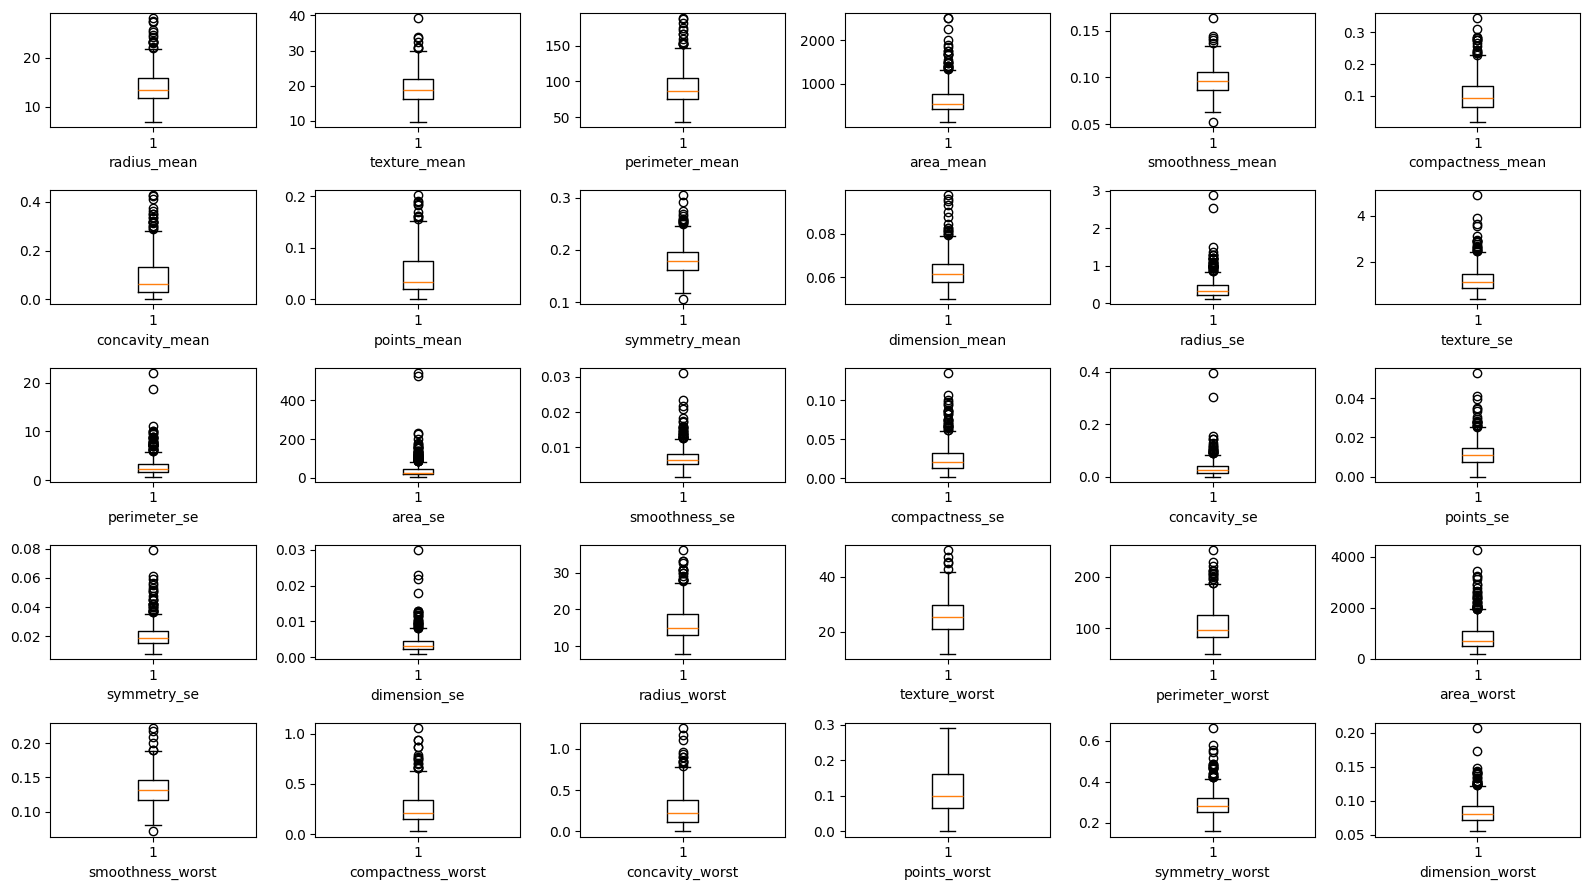

In [ ]:
#Outliers Visualization with boxplot

data.num = data.iloc[:, 1:].select_dtypes(include='number').columns.tolist() #select numerical features from the second column
plt.figure(figsize = (16,9))
for i,j in enumerate(data_num):

    plt.subplot(5,6,i+1)

    plt.boxplot(data[j])
    plt.xlabel("{}".format(j))
    plt.tight_layout()

plt.subplots_adjust()
plt.show()

Black circles are outliers. We have many back circles. This observation including the results from mean and spread analysis confirm that we need to treat the outliers.

In [25]:
#Outliers treatment :data point which have deviation more then +- 1.5 Standard deviation treat as outliers and it remove from column)
winsor = Winsorizer(
    capping_method='gaussian', 
    tail='both',         
    fold=1.5,          
    variables= data.iloc[:, 1:].select_dtypes(include='number').columns.tolist()   
)

df = winsor.fit_transform(data.copy())

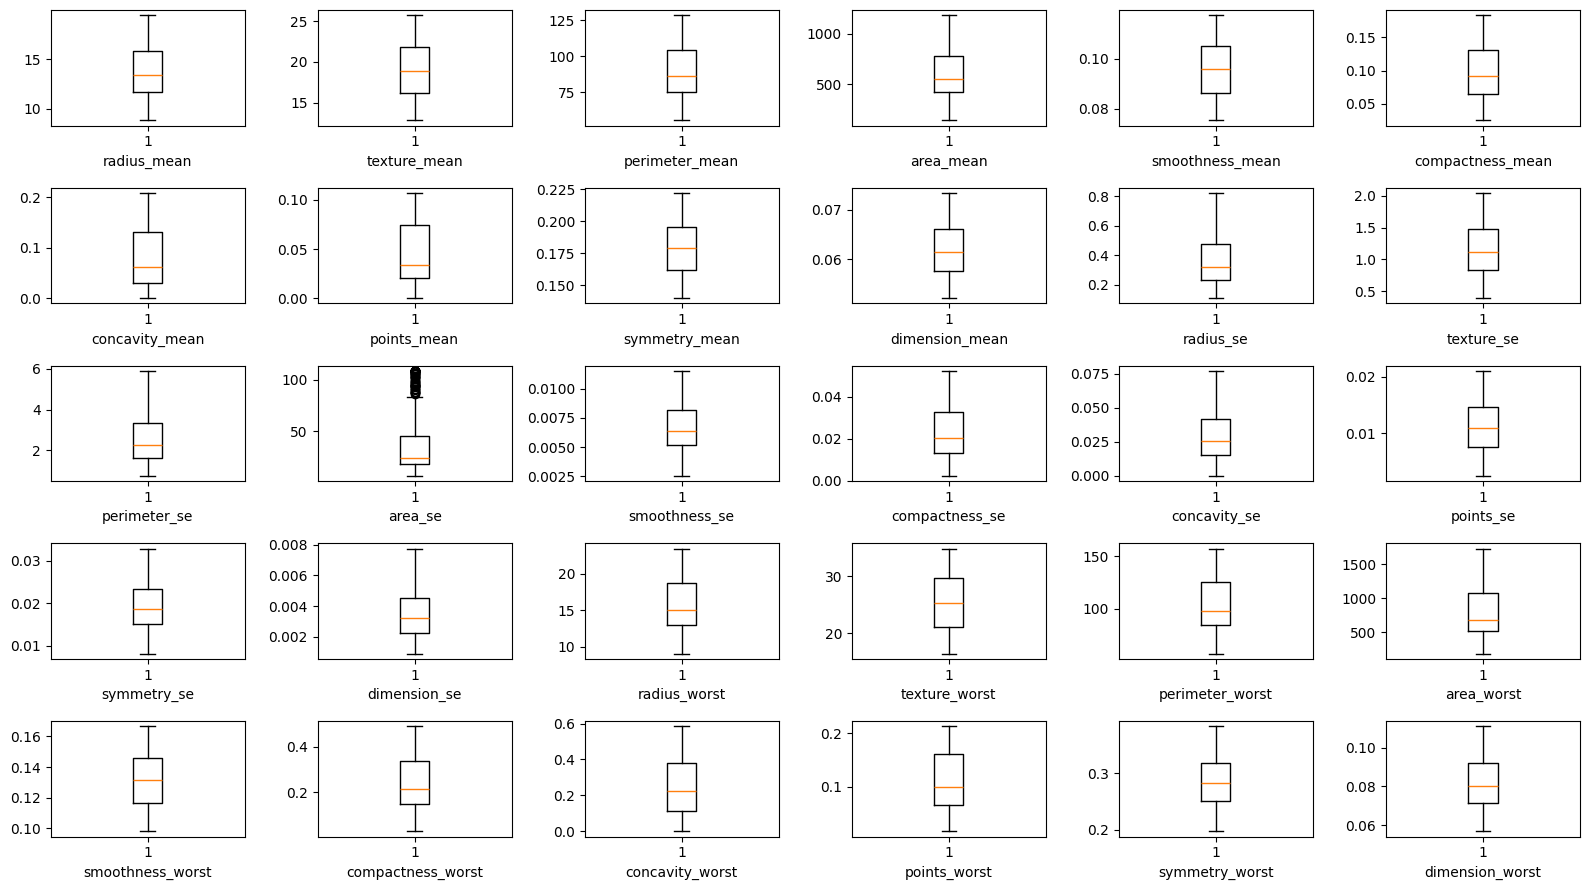

In [ ]:
#Visualization after outliers treatment 
df_num = df.iloc[:, 1:].select_dtypes(include='number').columns.tolist() #select numerical features from the second column
plt.figure(figsize = (16,9))
for i,j in enumerate(df_num):

    plt.subplot(5,6,i+1)

    plt.boxplot(df[j])
    plt.xlabel("{}".format(j))
    plt.tight_layout()

plt.subplots_adjust()
plt.show()

2. Exploratory Data Analysis (Ploting, Bivariate analysis)

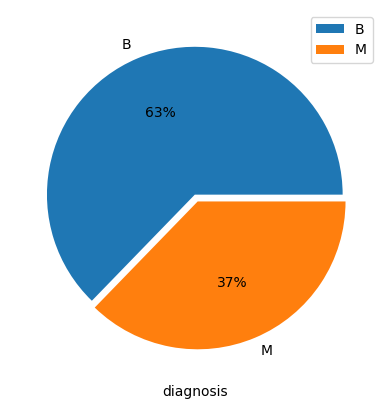

In [10]:
#Analysis of the unique categorial feature diagnosis
label = df["diagnosis"].value_counts().keys()
size = df["diagnosis"].value_counts().values

plt.pie(size, labels = label, autopct = "%1.0f%%", explode=[0, 0.05])
plt.xlabel("diagnosis")
plt.legend()
plt.show()

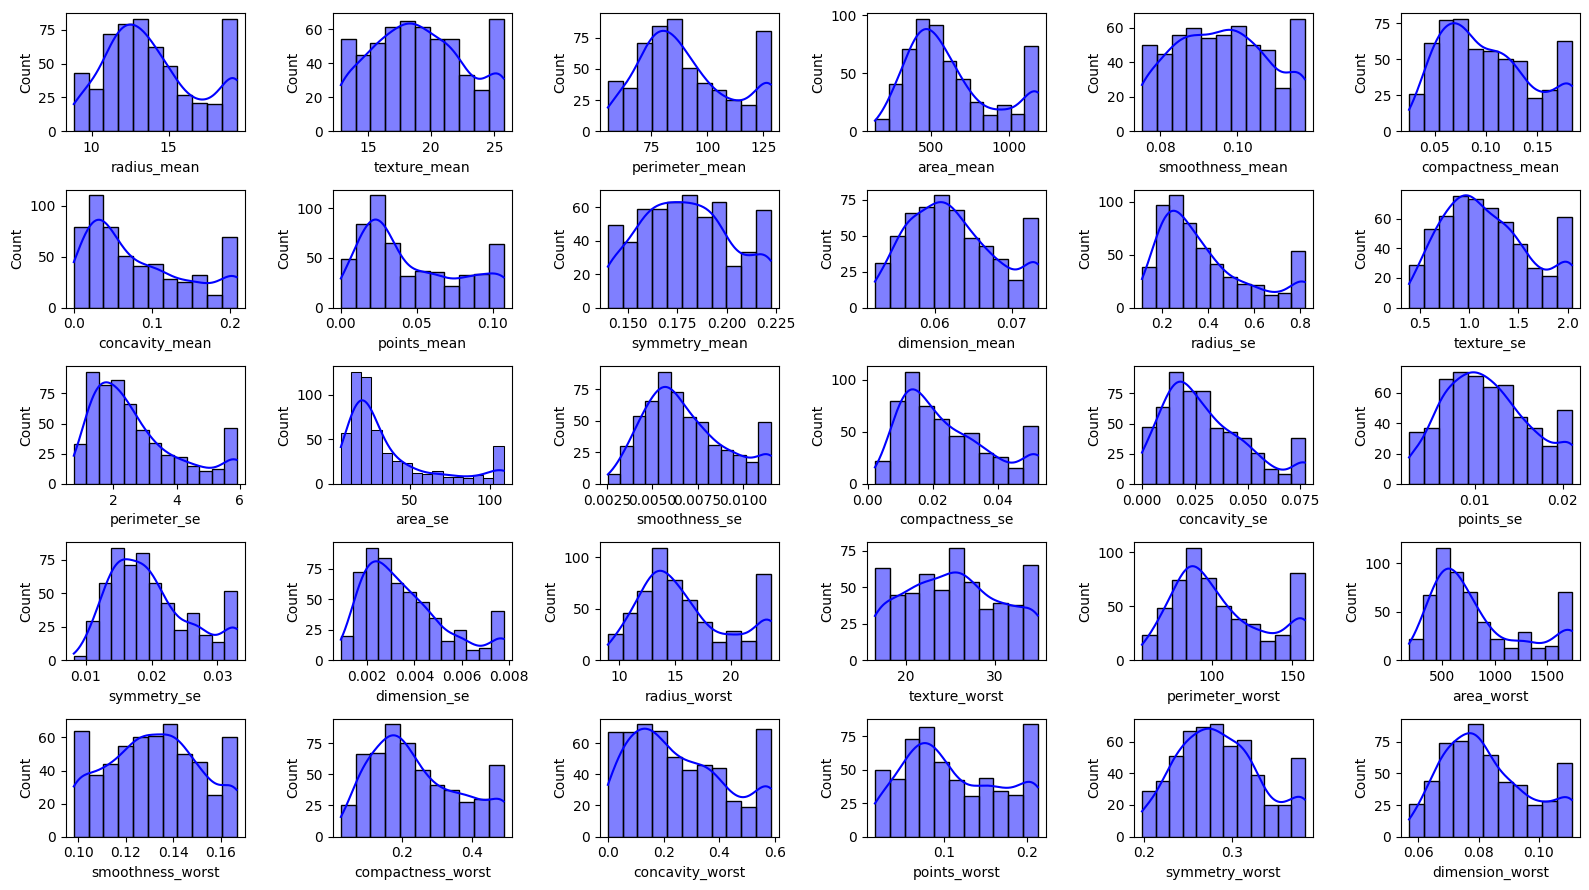

In [35]:
# Plots to visualize the shape of distribution, skewness, segment or cluster of each numerical feature
plt.figure(figsize = (16,9))
for i,j in enumerate(df_num):

    plt.subplot(5,6,i+1)
    
    sns.histplot(df[j], kde=True, color='blue')
    
    plt.tight_layout()

plt.subplots_adjust()
plt.show()

In [ ]:
#data["radius_mean"] : skewness is present in data toward right which means minority people have radius_mean approximately lies between 20 to 30. Majority of people have radius_mean approximately lies between 10 to 17.

# data["texture_mean"]: skewness is present in data toward right which means minority people have texture_mean approximately lies between 35 to 45. Majority of people have texture_mean approximately lies between 10 to 35.

# data["perimeter_mean"]: same skewness analysis as above. Minority people have perimeter_mean approximately lies between 150 to 210. Majority of people have perimeter_mean approximately lies between 30 to 130.

# data["concavity_mean"]: same skewness analysis as above. Minority people have concavity_mean approximately lies between 0.3 to 0.48

#Same analysis for all the other numerical features.

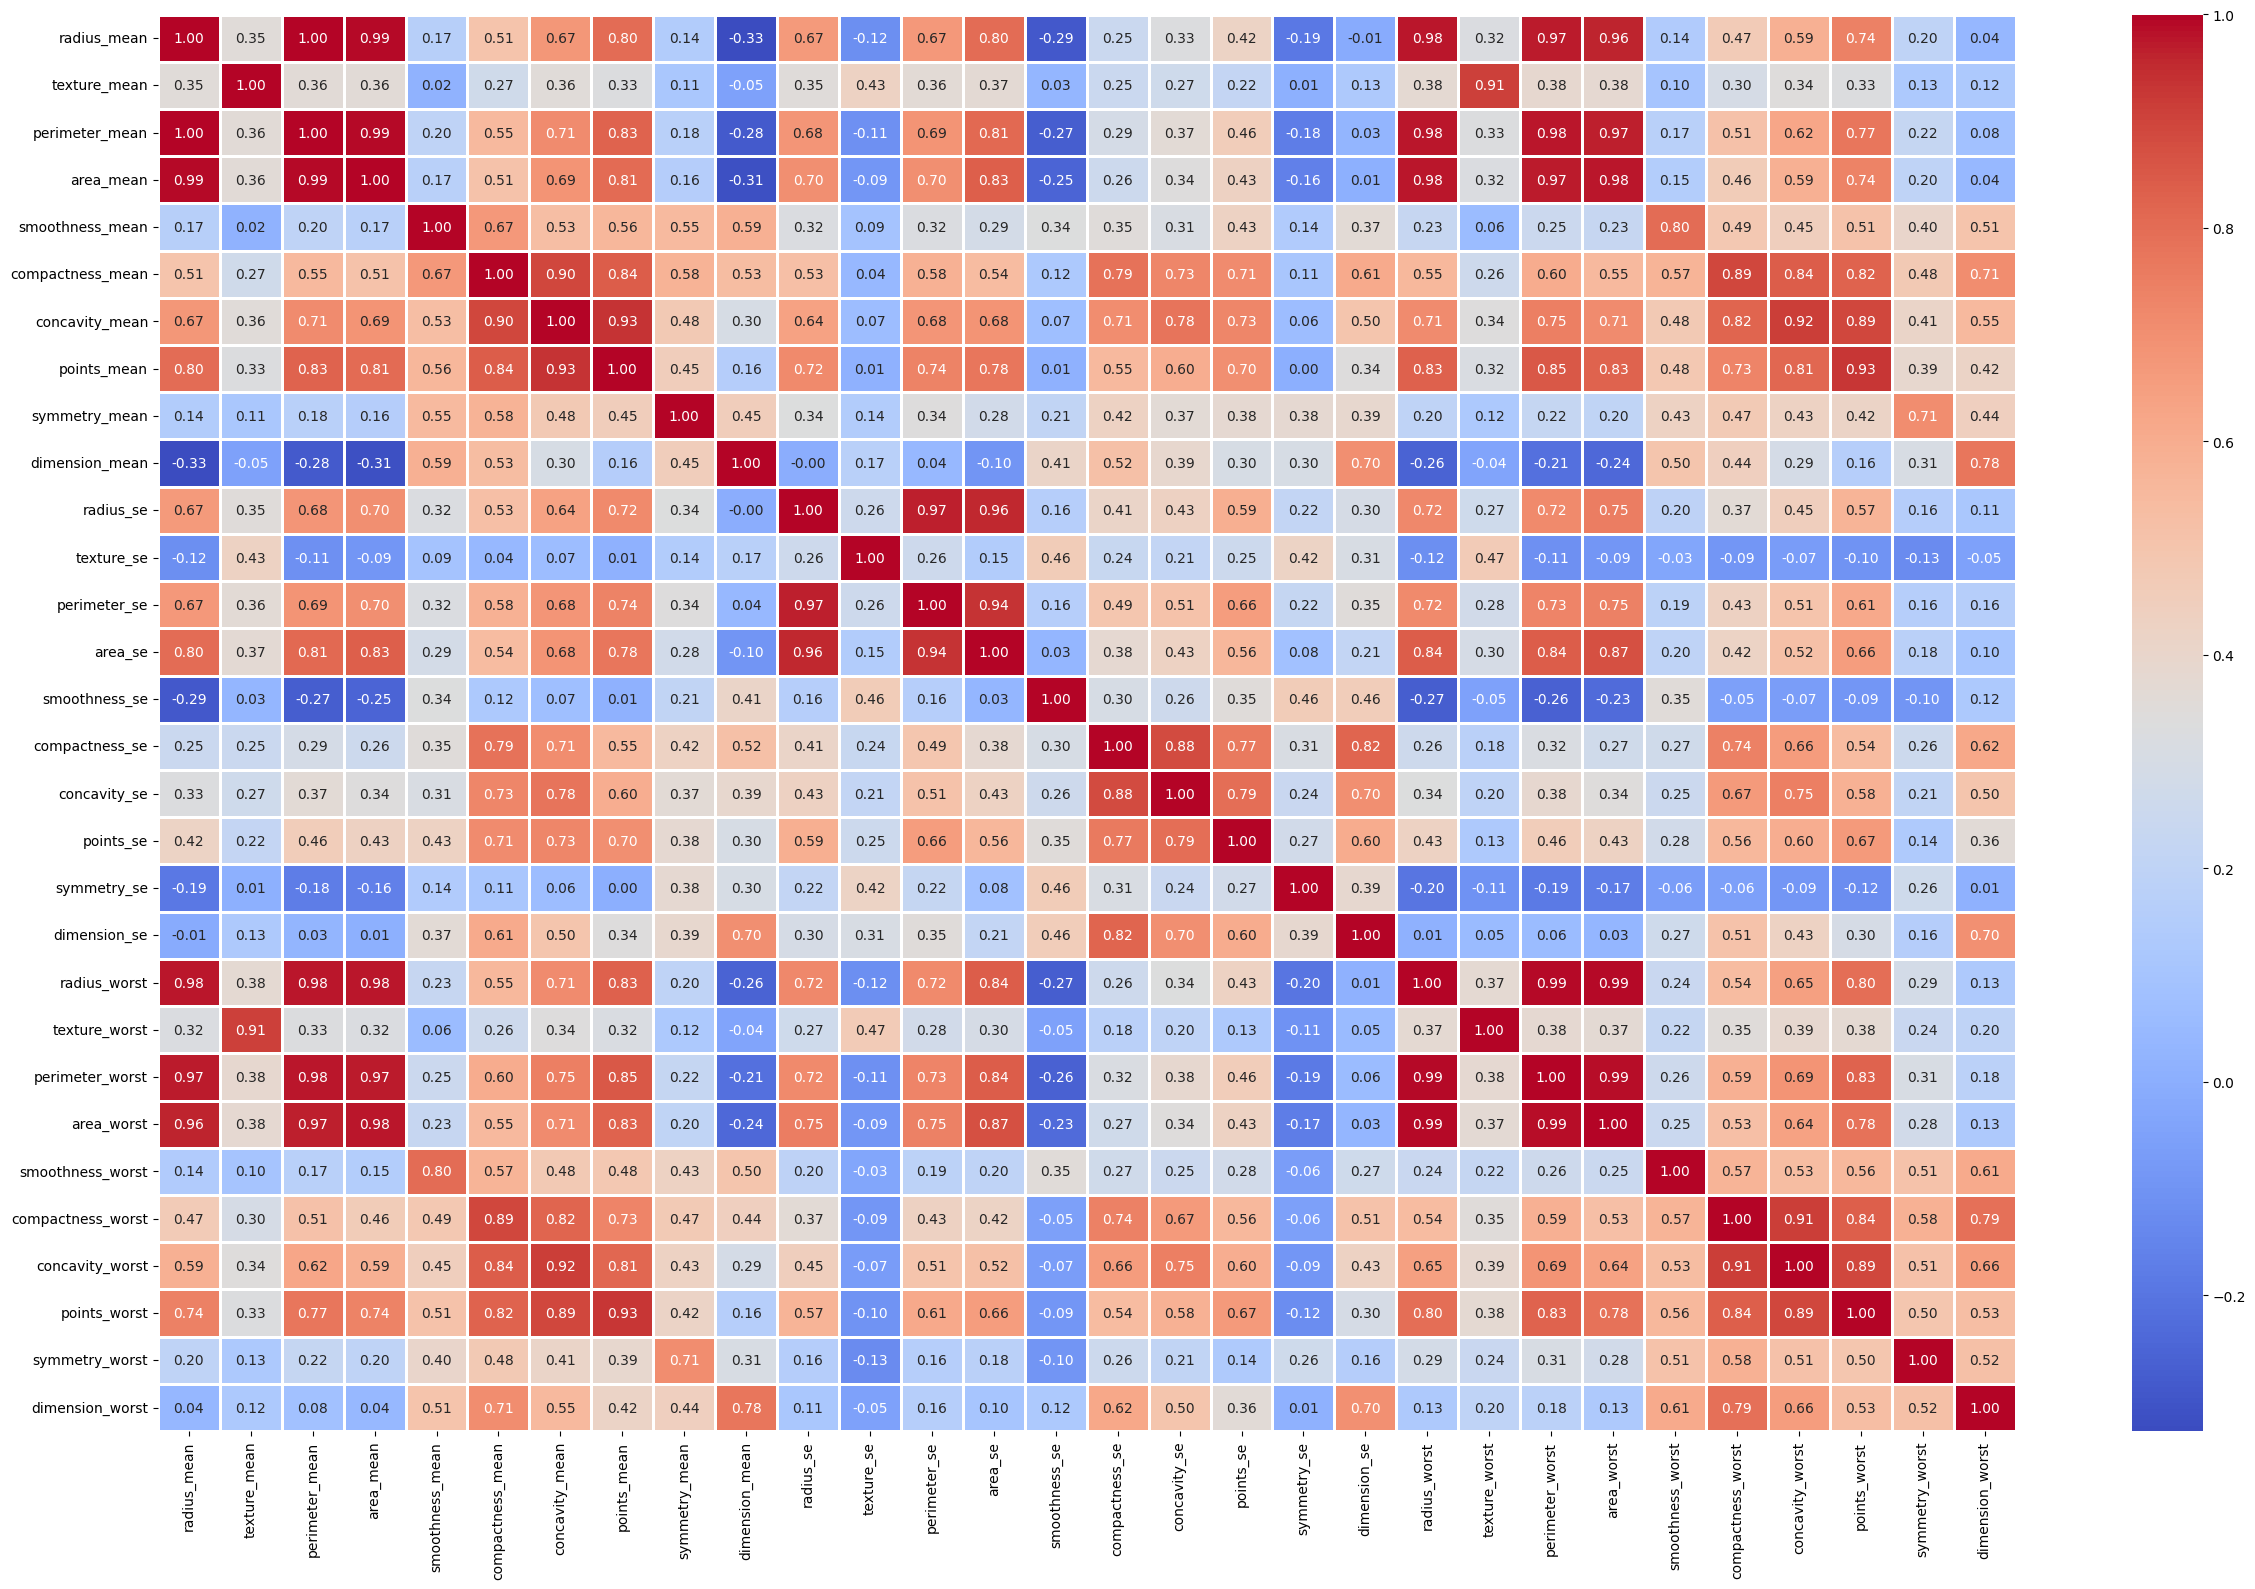

In [39]:
#Heatmap correlation
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize = (25,16))
sns.heatmap(df_numeric.corr(), annot = True, linewidths = 1, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.show()

In [ ]:
#Score > 0.85, strong correlation (Red)
#Score 0.4<>0.85, moderate correlation (between Red and light red)
#Score <0.4, weak correlation

#There are many correlated features. In order to estimate the relevant ones, let's perform a PCA. 

3. Multivariate analysis (Principal Component Analysis)


In [42]:
#Normalize the numerical data
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(
    scaler.fit_transform(df_numeric),
    columns=df_num,
    index=df.index
)
df_normalized = pd.concat([df[['diagnosis']], df_numeric_scaled], axis=1)



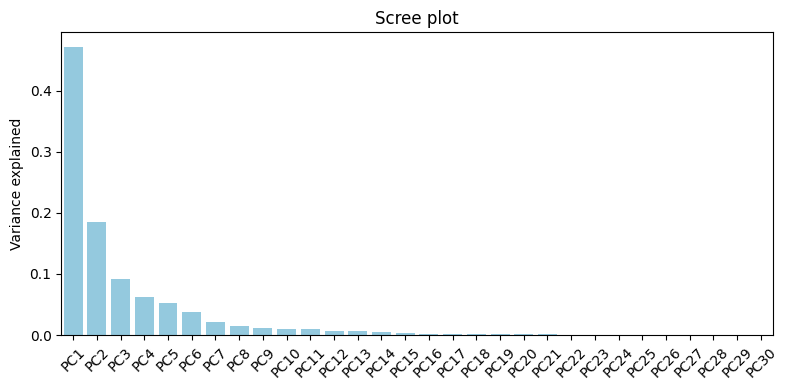

In [48]:
# PCA (We will divide df_normalized into numeric features and diagnosis to visualize if the ACP can potentially separate the classes Benign and Malignant)
numeric_features = df_normalized.drop(columns=['diagnosis'])  
diagnosis = df_normalized['diagnosis']   

pca = PCA()
numeric_features_pca = pca.fit_transform(numeric_features)
# Create a dataframe of principal components
df_pca = pd.DataFrame(numeric_features_pca, columns=[f"PC{i+1}" for i in range(numeric_features_pca.shape[1])])
df_pca['diagnosis'] = diagnosis  # Adding diagnosis for visualization    

#Display of variances explained by component
explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(8, 4))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained_var))], y=explained_var, color='skyblue')
plt.ylabel("Variance explained")
plt.title("Scree plot")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

The two first principal components PC1 and PC2 explain ≈ 70% of the variance. We will choose them as main axes for representations.

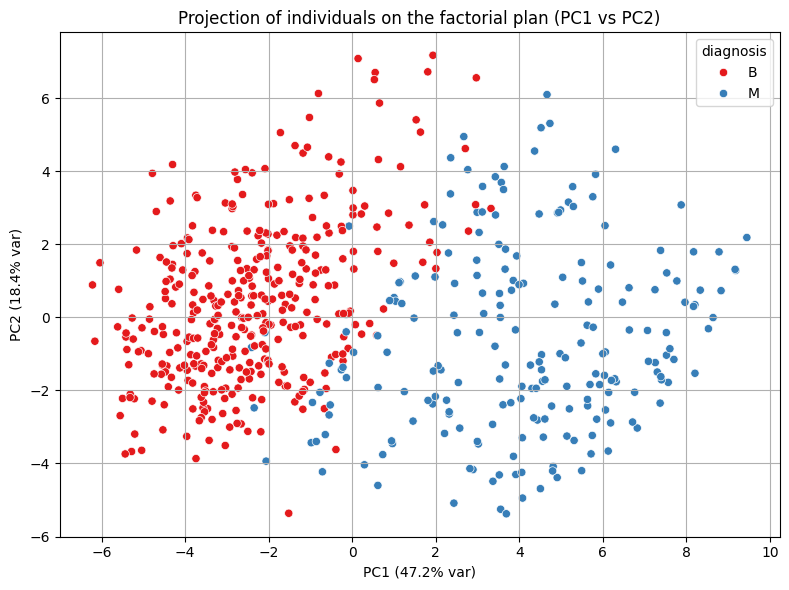

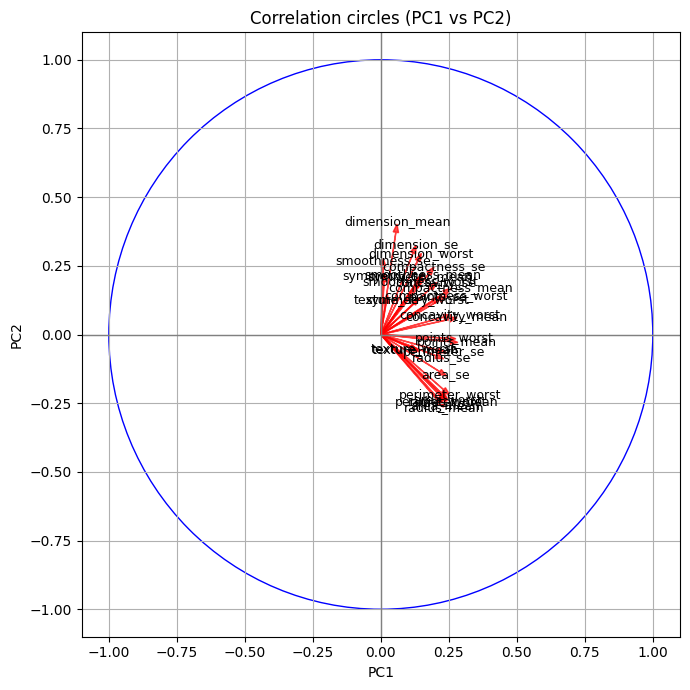

In [49]:
#Individuals representation 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="diagnosis", palette="Set1")
plt.title("Projection of individuals on the factorial plan (PC1 vs PC2)")
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% var)")
plt.grid(True)
plt.tight_layout()
plt.show()      

# Correlation circles
components = pca.components_
n_features = numeric_features.shape[1]
correlation_circle = pd.DataFrame(components.T[:, :2], columns=["PC1", "PC2"], index=numeric_features.columns)

plt.figure(figsize=(7, 7))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

# Arrows of features
for var in correlation_circle.index:
    x = correlation_circle.loc[var, "PC1"]
    y = correlation_circle.loc[var, "PC2"]
    plt.arrow(0, 0, x, y, color='r', alpha=0.7, head_width=0.02)
    plt.text(x * 1.1, y * 1.1, var, ha='center', va='center', fontsize=9)

plt.title("Correlation circles (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

Individuals Interpretation: 
Individuals are dispersed and there is a lot of variability. Moreover, the PAC clearly distinguishes classes Benign and Malignant on the main axes. 

Features interpretation: 
Arrows such as perimeter_worst, radius_worst, area_worst, perimeter_mean, radius_mean point away from the center then they are well represented.

radius_mean, perimeter_mean, area_mean, concavity_mean appear close in direction, they are positively correlated.

texture_worst, smoothness_se, symmetry_se point in another direction but are clustered, they form another correlated group.

Short or near-center arrows such as dimension_mean, dimension_se, texture_se, they are poorly represented.

Finally we can conclude that the PC1 gives us a lot of information about the tumor size/morphology (linked to radius, area, perimeter, etc.) and PC2 reflect the texture/regularity of tumors. 

Let's confirm this with the K-means clustering.

4. K-Means Clustering

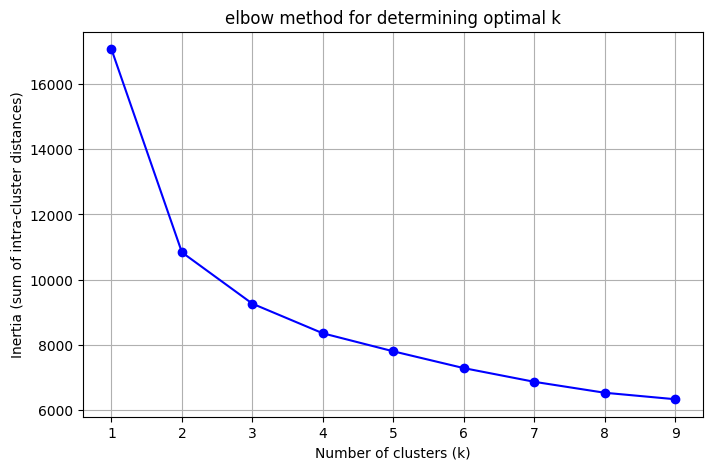

In [51]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(numeric_features)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel("Inertia (sum of intra-cluster distances)")
plt.title("elbow method for determining optimal k")
plt.grid(True)
plt.show()

There's a clear break (the “elbow”) around k = 3. After this point, the decrease in inertia becomes much smaller. 

In [52]:
k_optimal = 3  
km_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = km_final.fit_predict(numeric_features)

# Adding clusters to original DataFrame
df_normalized['cluster'] = clusters

For the K-means visualization, we will use PCA transformation to visualize the clusters like we did before with the classes of the feature diagnosis. 

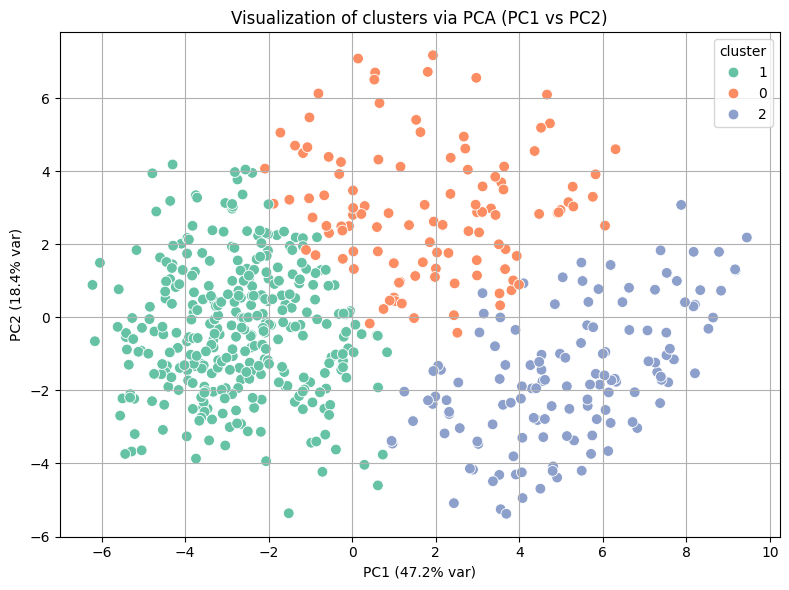

In [53]:
df_pca["cluster"] = df_normalized["cluster"].astype(str)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="cluster", palette="Set2", s=60)
plt.title("Visualization of clusters via PCA (PC1 vs PC2)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.grid(True)
plt.tight_layout()
plt.show()

Cross Analysis PCA + K-means clustering

Principal axes (PCA)
PC1 (horizontal axis) - 47.2% of variance: Mostly influenced by tumour size/morphology (radius, area, perimeter, etc.).
The further to the right, the larger or more morphologically atypical the tumours appear.

PC2 (vertical axis) - 18.4% of variance: Reflects another dimension such as texture or regularity, but less dominant.

Clusters identified
Cluster 1 (green): groups observations with low PC1 values and moderate PC2 values, i.e. smaller, more regular tumors.

Cluster 0 (orange): high PC2 values and centered around an average PC1 values, normal size and irregular tumors.

Cluster 2 (blue): strongly to the right on PC1, therefore associated with larger, more regular tumors, according to the important PCA variables.

Conclusion:

Clustering into 3 groups seems relevant.

Each cluster has potential biological significance in relation to tumor morphology and regularity.

These clusters can be crossed with the diagnosis features to explore which type of tumor is more likely to be a cancer.

diagnosis    B    M
cluster            
0           56   55
1          301   25
2            0  132


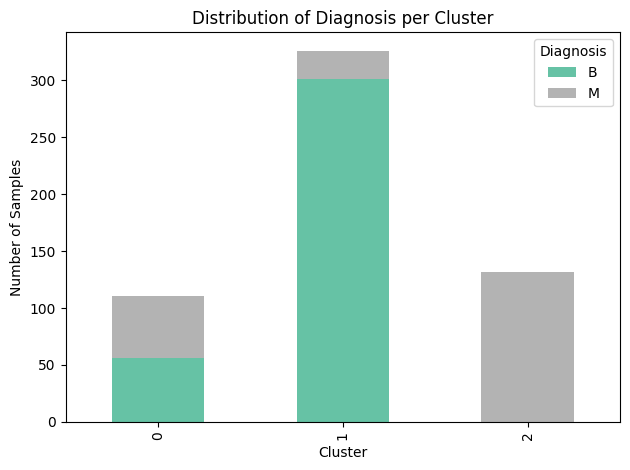

In [54]:
#Contingency table between clusters and actual diagnosis
contingency = pd.crosstab(df_normalized['cluster'], df_normalized['diagnosis'])
print(contingency)

#Barplot
contingency.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Distribution of Diagnosis per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


Most tumors from Cluster 1 are Benign and most tumors from Cluster 2 tumors are Malignant. 
Smaller and regular tumors are benign and larger but regular tumor are more like to be a cancer. 
Size highly determines if a tumor is a cancer but the regularity no because Cluster 0 where tumors are the most irregular contains as many benign as malignant tumors. 